# Student Dataset

In [308]:
# Import required libraries
import hashlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [309]:
# Using SHA-256 to generate unique seed
seed = int( hashlib.sha256("m.samartha".encode()).hexdigest(),16) % (2**32)
print(seed)

2669878649


## Q1.0 Dataset Generation

In [310]:
# Define the StudentDataset Class

class StudentDataset:
    def __init__(self, num_students: int, seed: int):
        self.num_students = num_students
        self.seed = seed
        np.random.seed(seed) # So that the same data is reproduced when ran again

        self.data = self.assemble_data()

    def get_full_dataframe(self):
        """Returns the full dataset without generating again"""
        return self.data
    
    def generate_gender(self) -> list[str]:
        """Returns gender column acc to specified distribution"""
        genders = ["Male", "Female", "Other"]
        probabilities = [0.65, 0.33, 0.02]  # Given distribution

        # Return the required list by sampling from "genders" acc to "probabilities"
        return np.random.choice(genders, size=self.num_students, p=probabilities).tolist()

    def generate_major(self) -> list[str]:
        """Returns Major column with acc to specified distribution"""
        majors = ["B.Tech", "MS", "PhD"]
        probabilities = [0.7, 0.2, 0.1]

        # Return the required list by sampling from "majors" acc to "probabilities"
        return np.random.choice(majors, size=self.num_students, p=probabilities).tolist()
    
    def generate_program(self, majors : list[str]) -> list[str]:
        """Returns the Program column based on the Major"""

        programs_choices = ["CSE", "ECE", "CHD", "CND"]
        probabilities = {
            "B.Tech": [0.4, 0.4, 0.1, 0.1],
            "MS": [0.3, 0.3, 0.2, 0.2],
            "PhD": [0.25, 0.25, 0.25, 0.25]
        }

        programs = [] 

        for major in majors:
            # Get the probability distribution for this major
            prob_dist = probabilities[major]

            # Randomly choose one program according to this distribution
            chosen_program = np.random.choice(programs_choices, p=prob_dist)

            # Append the chosen program to the programs list
            programs.append(chosen_program)

        return programs
    
    def generate_gpa(self, majors : list[str]) -> list[float]:
        """Return a list of GPAs corresponding to the given majors"""
        gpas = []

        for major in majors:
            if major == "B.Tech":
                gpa = np.random.normal(7.0, 1.0)
            if major == "MS":
                gpa = np.random.normal(8.0, 0.7)
            if major == "PhD":
                gpa = np.random.normal(8.3, 0.5)

            # Clip GPA to [4.0, 10.0]
            if gpa < 4:
                gpa = 4
            elif gpa > 10:
                gpa = 10       

            # Round the gpa to 2 decimal places
            gpas.append(round(gpa, 2))
        
        return gpas

    def assemble_data(self) -> pd.DataFrame:
        """Assembles the complete student dataset"""

        genders = self.generate_gender()
        majors = self.generate_major()
        programs = self.generate_program(majors)
        gpas = self.generate_gpa(majors)

        # Create a DataFrame
        df = pd.DataFrame({
            "Gender": genders,
            "Major": majors,
            "Program": programs,
            "GPA": gpas
        })

        return df


In [311]:
dataset = StudentDataset(num_students=10000, seed=seed)
df = dataset.get_full_dataframe()
# Save dataframe, so that it can be resued for further questions
df.to_csv("student-dataset.csv", index=False)
print(df)

      Gender   Major Program   GPA
0       Male  B.Tech     CHD  6.65
1       Male  B.Tech     CSE  7.05
2     Female  B.Tech     CSE  7.67
3       Male  B.Tech     ECE  8.89
4       Male  B.Tech     ECE  6.35
...      ...     ...     ...   ...
9995    Male  B.Tech     ECE  5.82
9996  Female  B.Tech     ECE  7.72
9997    Male     PhD     CHD  7.68
9998    Male  B.Tech     ECE  7.61
9999    Male     PhD     ECE  8.26

[10000 rows x 4 columns]


## Q1.1 Dataset Analysis

### (a) Visualisations

In [312]:
class Visualiser:
    def __init__(self, df):
        self.df = df
        self.program_order = ["CSE", "ECE", "CHD", "CND"]  # Default program order for plots

    def plot_gender_distribution(self):
        """Plots the distribution of genders in the dataset with bar and pie charts"""

        counts = self.df["Gender"].value_counts()

        fig, axes = plt.subplots(1, 2, figsize=(12, 6))

        # Bar Chart
        axes[0].bar(counts.index, counts.values, color=['skyblue', 'lightgreen', 'salmon'])
        for i, (gender, count) in enumerate(zip(counts.index, counts.values)):
            axes[0].text(i, count, str(count), ha='center', va='bottom', fontsize=10)
        axes[0].set_title("Gender Distribution (Bar Chart)", fontsize=14)
        axes[0].set_xlabel("Genders", fontsize=12)
        axes[0].set_ylabel("Count", fontsize=12)

        # Pie Chart
        axes[1].pie(
            counts.values,
            labels=counts.index,
            autopct='%1.1f%%',
            startangle=90,
            colors=['skyblue', 'lightgreen', 'salmon']
        )
        axes[1].set_title("Gender Distribution (Pie Chart)", fontsize=14)

        fig.text(
            0.95, 0.95, "m.samartha",
            ha='right', va='top',
            fontsize=10, color='gray', alpha=0.7
        )

        plt.tight_layout()
        plt.show()
    
    def plot_major_distribution(self):
        """Plots the distribution of majors in the dataset"""

        counts = self.df["Major"].value_counts()
        plt.bar(counts.index, counts.values, color=['skyblue', 'lightgreen', 'salmon'])

        # Add annotations for each bar
        for i, (major, count) in enumerate(zip(counts.index, counts.values)):
            plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
        
        plt.title("Major Distribution", fontsize=16)
        plt.xlabel("Majors", fontsize=14)
        plt.ylabel("Count", fontsize=14)
        plt.text(
            0.95, 0.95, "m.samartha",
            ha='right', va='top',
            transform=plt.gca().transAxes,
            fontsize=10, color='gray', alpha=0.7
        )
        plt.show()

    def plot_program_distribution(self):
        """Plots the distribution of programs in the dataset"""
        counts = self.df["Program"].value_counts()
        plt.bar(counts.index, counts.values, color=['skyblue', 'lightgreen', 'salmon', 'lightpink'])

        # Add annotations for each bar
        for i, (program, count) in enumerate(zip(counts.index, counts.values)):
            plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

        plt.title("Program Distribution", fontsize=16)
        plt.xlabel("Program", fontsize=14)
        plt.ylabel("Count", fontsize=14)
        plt.text(
            0.95, 0.95, "m.samartha",
            ha='right', va='top',
            transform=plt.gca().transAxes,
            fontsize=10, color='gray', alpha=0.7
        )
        plt.show()

    def plot_gpa_distribution(self, bins: int = 25):
        """Plots the distribution of GPAs in the dataset"""
        counts, bins, patches = plt.hist(self.df["GPA"], bins=bins, edgecolor="black")
        plt.title("GPA Distribution", fontsize=16)
        plt.xlabel("GPA", fontsize=14)
        plt.ylabel("Frequency", fontsize=14)
        # Annotate count above each bar
        for i in range(len(patches)):
            bin_center = (bins[i] + bins[i+1]) / 2
            plt.text(bin_center, counts[i], str(int(counts[i])), ha='center', va='bottom', fontsize=10)
        plt.text(
            0.95, 0.95, "m.samartha",
            ha='right', va='top',
            transform=plt.gca().transAxes,
            fontsize=10, color='gray', alpha=0.7
        )
        plt.show()

    def plot_program_by_major(self):
        """Plots the distribution of programs across different majors using a bar chart"""
        counts = self.df.groupby(["Major", "Program"]).size().unstack(fill_value=0)
        counts = counts.reindex(columns=self.program_order) #Reorder counts

        majors = counts.index # majors = 3
        programs = counts.columns # programs = 4
        x = np.arange(len(majors))  
        bar_width = 0.2           

        fig, ax = plt.subplots(figsize=(10, 6))

        # Plot each program as a separate set of bars
        for i, program in enumerate(programs):
            # Array of students in current program across diff majors
            values = counts[program]

            bars = ax.bar(x + i*bar_width, values, width=bar_width, label=program)
            
            # Add percentage annotations
            for j, bar in enumerate(bars):
                total_major = counts.iloc[j].sum()  # total students in this major

                # values.iloc[j] = no of students in this major for the current program
                percent = (values.iloc[j] / total_major) * 100 if total_major > 0 else 0
                ax.text(
                    bar.get_x() + bar.get_width()/2,   
                    bar.get_height() + 0.5,            
                    f"{percent:.1f}%",                 
                    ha="center", va="bottom", fontsize=9
                )

        ax.set_title("Program Distribution for Each Major", fontsize=16)
        ax.set_xlabel("Major", fontsize=14)
        ax.set_ylabel("Number of Students", fontsize=14)
        ax.set_xticks(x + bar_width * (len(programs)-1) / 2)
        ax.set_xticklabels(majors)
        ax.legend(title="Program", loc = 'upper center')

        plt.text(
            0.95, 0.95, "m.samartha",
            ha='right', va='top',
            transform=plt.gca().transAxes,
            fontsize=10, color='gray', alpha=0.7
        )

        plt.tight_layout()
        plt.show()

    def plot_gpa_by_major(self):
        """Plots GPA by Major using a violin plot"""
        plt.figure(figsize=(10, 6))
        
        sns.violinplot(x="Major", y="GPA", data=self.df, inner="box", cut=0, palette="husl")
        
        plt.title("GPA by Major", fontsize=16)
        plt.xlabel("Major", fontsize=14)
        plt.ylabel("GPA", fontsize=14)
        plt.text(
            0.95, 0.95, "m.samartha",
            ha='right', va='top',
            transform=plt.gca().transAxes,
            fontsize=10, color='gray', alpha=0.7
        )
        plt.show()

    def plot_gpa_by_program(self):
        """Plots GPA by Program using a violin plot"""
        plt.figure(figsize=(10, 6))

        sns.violinplot(
            x="Program", y="GPA", data=self.df,
            order=self.program_order, inner="box", cut=0, palette="husl"
        )

        plt.title("GPA by Program", fontsize=16)
        plt.xlabel("Program", fontsize=14)
        plt.ylabel("GPA", fontsize=14)
        plt.text(
            0.95, 0.95, "m.samartha",
            ha='right', va='top',
            transform=plt.gca().transAxes,
            fontsize=10, color='gray', alpha=0.7
        )
        plt.show()

    def plot_gpa_by_program_and_major(self):
        """Plots GPA by Program and Major using a violin plot"""
        plt.figure(figsize=(12, 6))

        sns.violinplot(
            x="Program", y="GPA", hue="Major", data=self.df, order = self.program_order,
            split=True, inner="box", cut=0, palette="husl"
        )
        plt.title("GPA by Program and Major", fontsize=16)
        plt.xlabel("Program", fontsize=14)
        plt.ylabel("GPA", fontsize=14)
        plt.text(
            0.95, 0.95, "m.samartha",
            ha='right', va='top',
            transform=plt.gca().transAxes,
            fontsize=10, color='gray', alpha=0.7
        )
        plt.show()

    def plot_sampled_dataset(self):
        """Plots a box plot of GPA by Program, colored by Gender"""

        # Here Major is ignored for plotting as the plotting already is of 
        # 3 dimensions. Moreover since the sample size is relatively small(100)
        # we dont have many MS/PhD students and the data is dominated by B.Tech

        sample_df = dataset.data.sample(100, random_state=42)

        # Box plot of GPA by Program, colored by Gender, faceted by Major
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=sample_df, x="Program", y="GPA", hue="Gender",  order=self.program_order)
        plt.title("GPA Distribution by Program and Gender (100 sampled students)", fontsize=16)
        plt.xlabel("Program", fontsize=14)
        plt.ylabel("GPA", fontsize=14)
        plt.text(
            0.95, 0.95, "m.samartha",
            ha='right', va='top',
            transform=plt.gca().transAxes,
            fontsize=10, color='gray', alpha=0.7
        )
        plt.show()

    def plot_entire_dataset_summary(self):
        """Plots violin plots, heatmap, and pie charts summarizing dataset"""
        import seaborn as sns
        import matplotlib.pyplot as plt
        import pandas as pd
        import numpy as np

        sample_size = min(10000, len(self.df))
        sampled = self.df.sample(sample_size, random_state=42)

        # Pie chart of Major and Program distributions
        # Count students grouped by Major and Program
        counts = self.df.groupby(["Major", "Program"]).size().reset_index(name="count")

        # Assign base colors for majors
        major_colors = {
            "B.Tech": "Blues",
            "MS": "Greens",
            "PhD": "Oranges"
        }

        # Collect pie chart wedges
        sizes = counts["count"]
        labels = [f"{row.Major}-{row.Program}" for row in counts.itertuples()]
        colors = []

        for row in counts.itertuples():
            cmap = plt.get_cmap(major_colors[row.Major])
            # Shade selection: scale by program index within a major
            programs_in_major = counts[counts["Major"] == row.Major]["Program"].unique()
            shade_index = list(programs_in_major).index(row.Program)
            colors.append(cmap(0.3 + 0.7 * shade_index / (len(programs_in_major)-1 + 1e-6))) 

        plt.figure(figsize=(8, 8))
        _, _, _ = plt.pie(
            sizes,
            labels=labels,
            autopct='%1.1f%%',
            startangle=140,
            colors=colors,
            textprops={'fontsize': 12}
        )
        plt.title("Distribution of Students by Major and Program", fontsize=16, fontweight='bold')
        plt.show()

        # Violin plot of GPA by Gender, faceted by Major and Program
        g = sns.catplot(
            data=sampled,
            x="Gender", y="GPA",
            row="Major", col="Program",
            col_order=self.program_order,
            hue="Gender",
            kind="violin",  
            sharey=True,    
            height=4, aspect=1
        )

        g.set_titles(row_template="{row_name}", col_template="{col_name}", fontsize=14, fontweight='bold')
        g.set_axis_labels("Gender", "GPA", fontsize=14, fontweight='bold')
        plt.subplots_adjust(top=0.92)
        g.figure.suptitle("Entire Dataset Summary", fontsize=16, fontweight='bold')
        g.figure.text(
            0.95, 0.965, "m.samartha",
            ha='right', va='top',
            fontsize=20, color='gray', alpha=0.7
        )
        plt.show()

        # Heatmap of GPA correlations
        encoded = pd.get_dummies(self.df, columns=["Gender", "Major", "Program"], drop_first=False)
        corr = encoded.corr(numeric_only=True)

        plt.figure(figsize=(12, 8))
        sns.heatmap(corr[["GPA"]].sort_values(by="GPA", ascending=False),
                    annot=True, cmap="coolwarm", cbar=True)
        plt.title("Correlation of GPA with other features", fontsize=16, fontweight='bold')
        plt.show()


In [313]:
dataset = StudentDataset(num_students=10000, seed=seed)
df = dataset.get_full_dataframe()
viz = Visualiser(df)

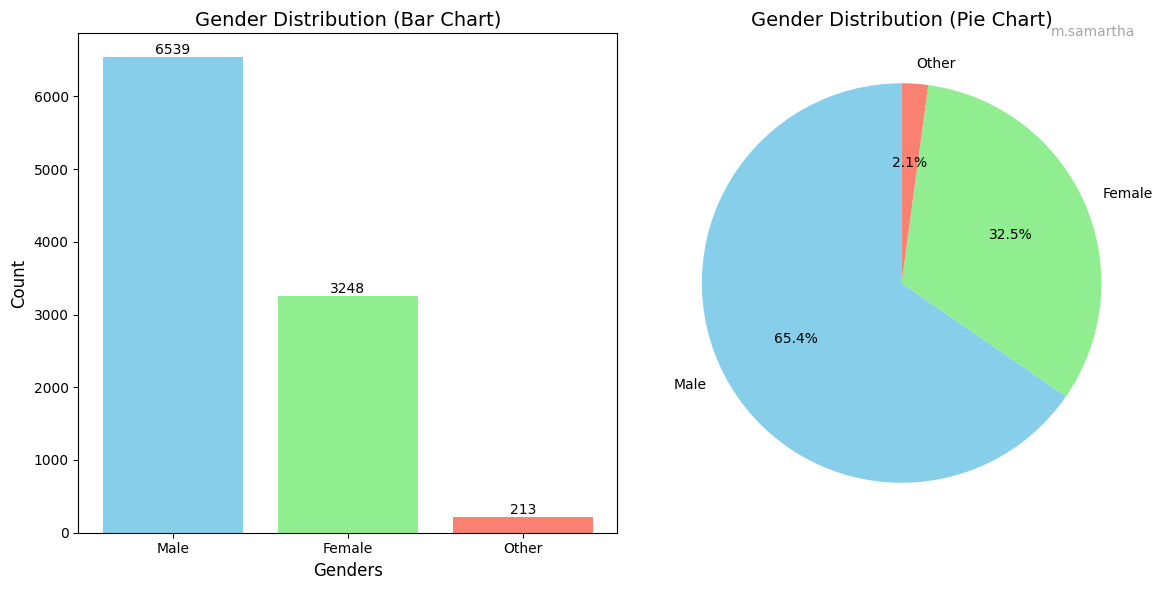

In [314]:
# (a) Vizualise Gender
viz.plot_gender_distribution()

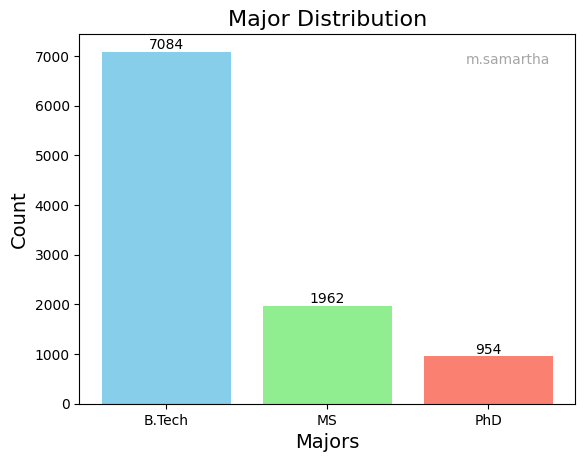

In [315]:
# (b) Visualize Major
viz.plot_major_distribution()

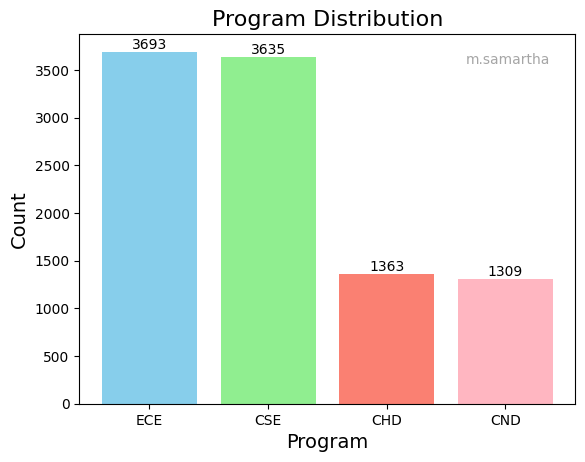

In [316]:
# (c) Visualize Program
viz.plot_program_distribution()

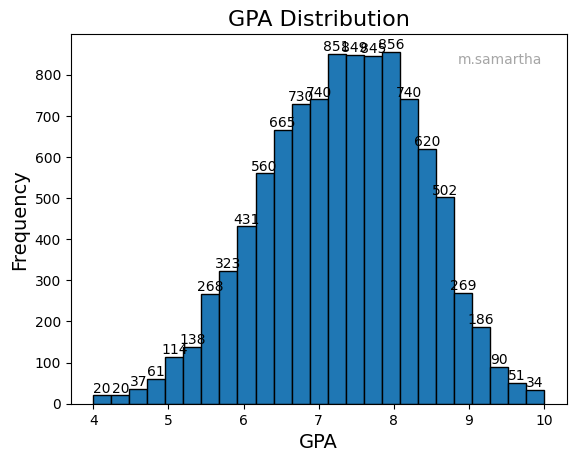

In [317]:
# (d) Visualize GPA
viz.plot_gpa_distribution()

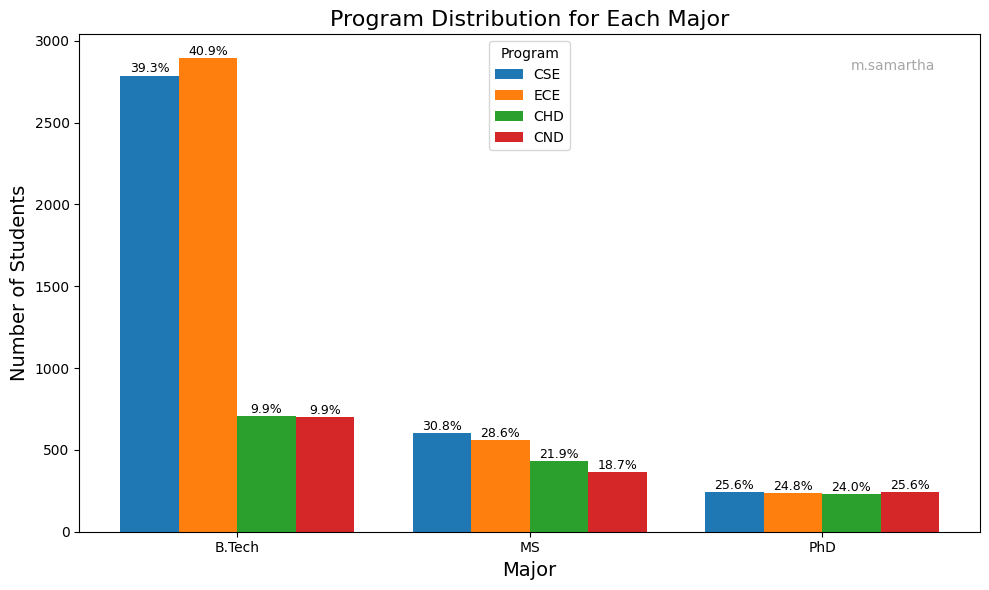

In [318]:
# (e) Visualize Program conditioned on major
viz.plot_program_by_major()

/tmp/ipykernel_60578/3862403219.py:169: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


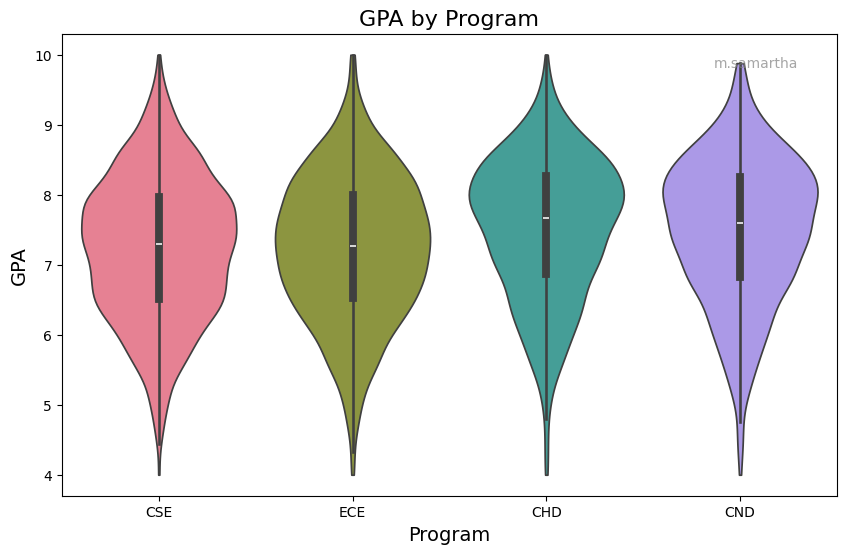

In [319]:
# (f) Visualize GPA conditioned on program
viz.plot_gpa_by_program()

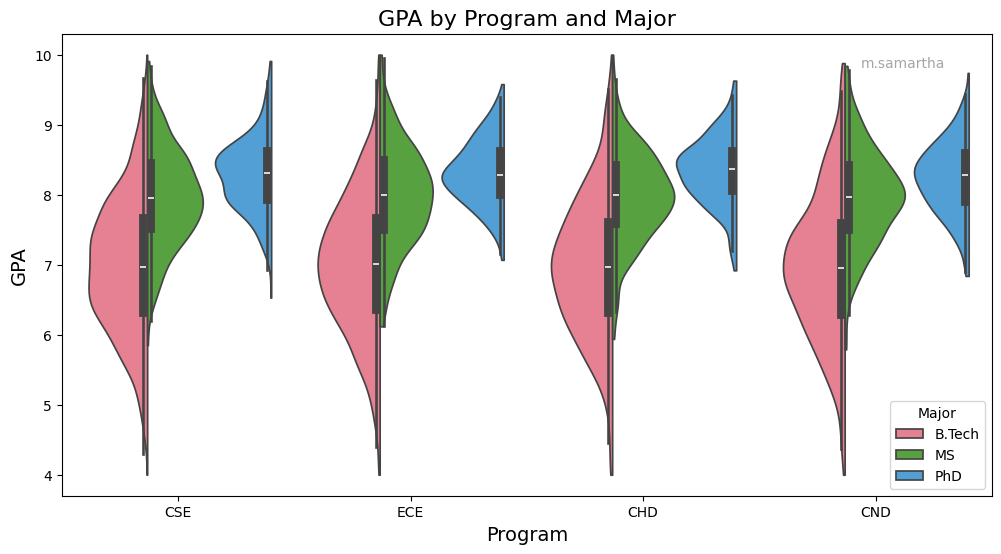

In [320]:
# (g) Visualize GPA conditioned on program and major
viz.plot_gpa_by_program_and_major()

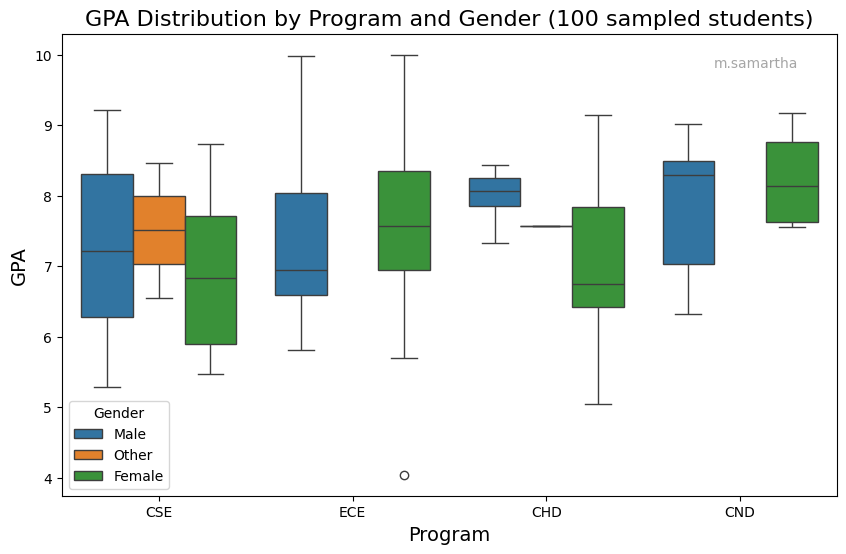

In [321]:
# (h) Visualize Sampled dataset
viz.plot_sampled_dataset()

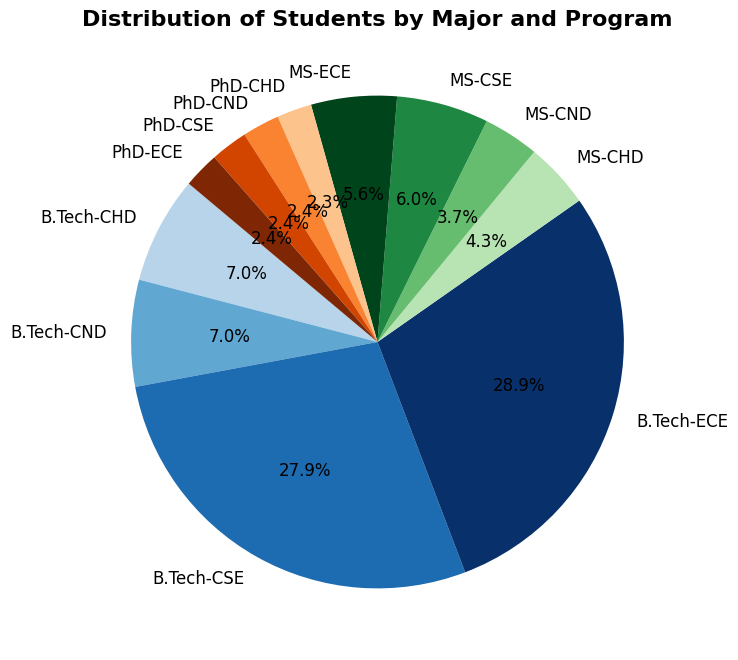

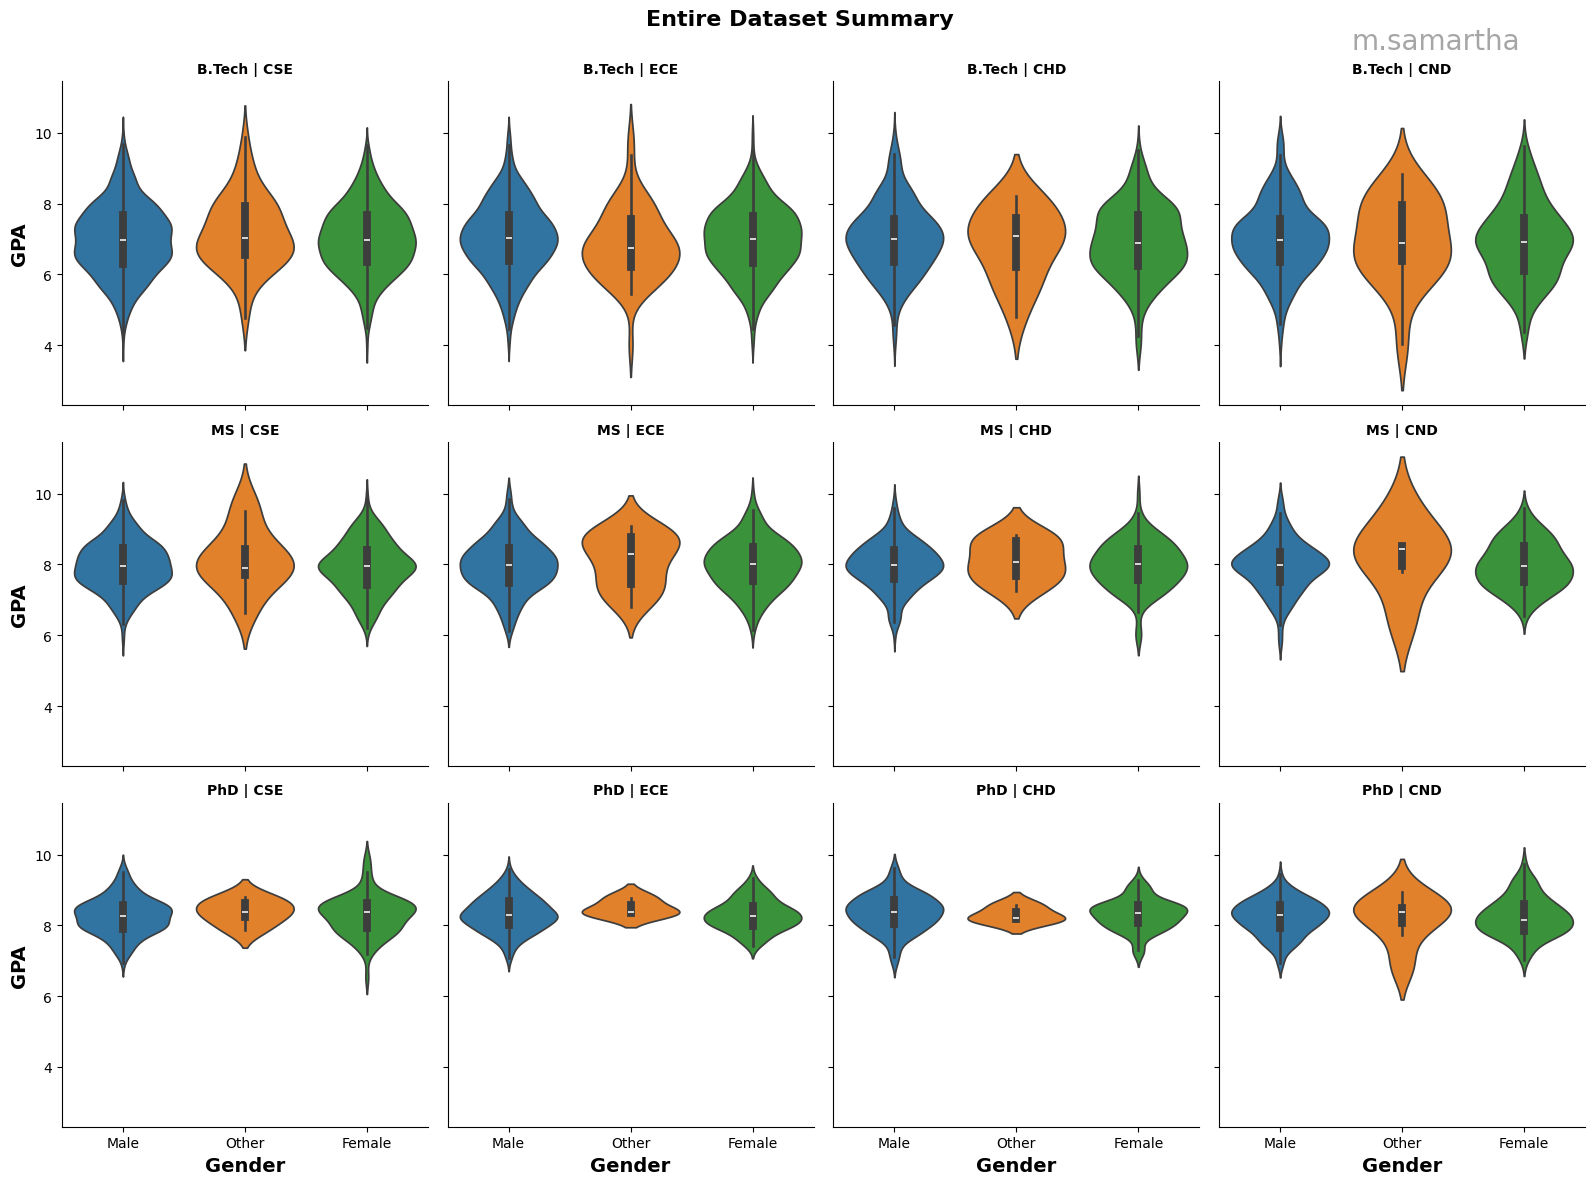

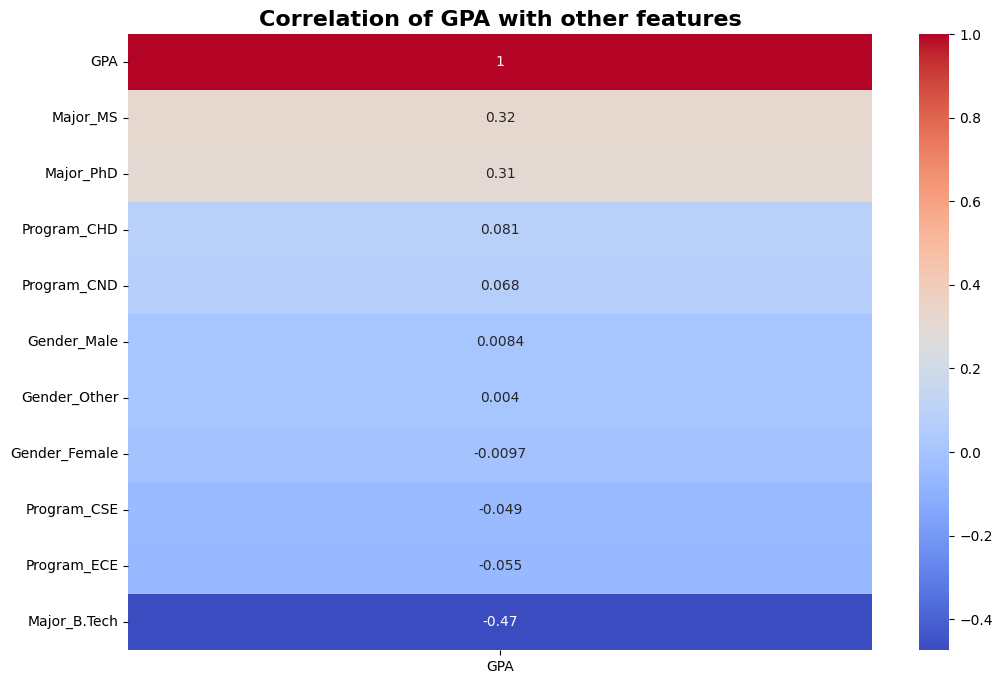

In [322]:
# (i) Visualize dataset summary
viz.plot_entire_dataset_summary()

### (b) GPA Summary Statistics

In [323]:
def gpa_mean_std(self) -> tuple[float, float]:
    """Returns Mean and Std. Deviation of GPA"""
    mean = self.data["GPA"].mean()
    std = self.data["GPA"].std()
    
    return round(mean, 4), round(std, 4)

# Test
mean_gpa, std_gpa = gpa_mean_std(dataset)
print(f"Mean GPA: {mean_gpa}, Standard Deviation: {std_gpa}")


Mean GPA: 7.3131, Standard Deviation: 1.0362


#### Observations:
Even though the mean of the GPA distribution of MS and PhD are 8.0 and 8.3 respectively, as the share of B.Tech is much larger (70%), the overall mean is heavily influenced by the B.Tech distribution. This shows that the distribution of GPAs is not uniform across different programs, and the larger population of B.Tech students is pulling the overall average down. Regarding the standard deviations, the B.Tech has the highest standard deviation (1.0), indicating a wider spread of GPAs among its students compared to the other programs.

### (c) Program-Major Combinations

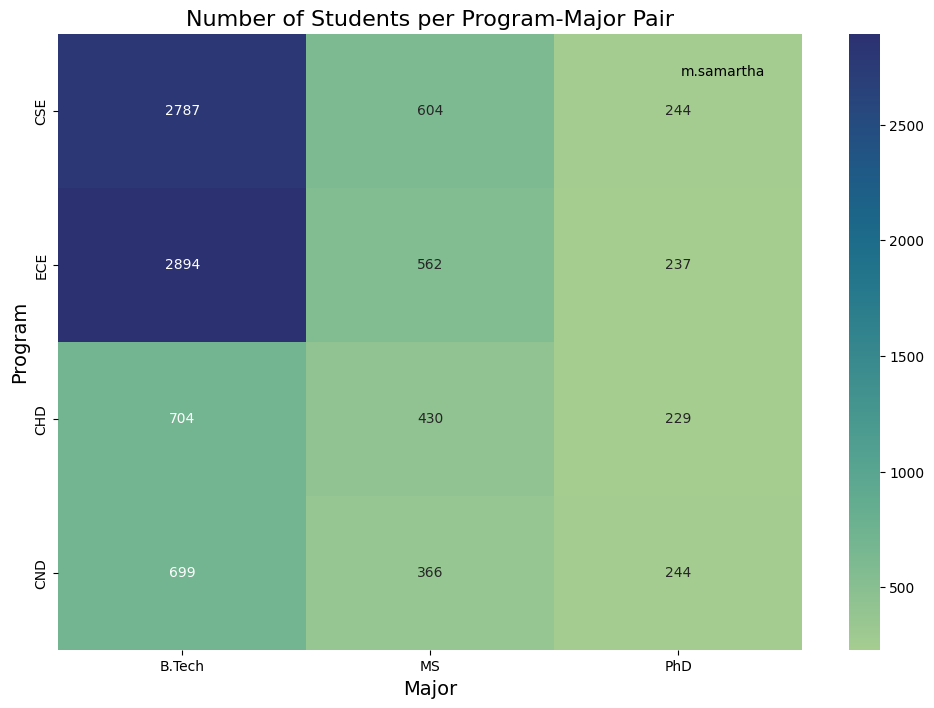

In [324]:
class Program_Major:
    def __init__(self, df):
        self.data = df
    
    def count_students_per_program_major_pair(self) -> pd.DataFrame:
        """Counts the number of students for each Program-Major pair"""
        counts = self.data.groupby(["Program", "Major"]).size().reset_index(name='Count')
        return counts

    def visualize_students_per_program_major_pair(self, counts_df: pd.DataFrame):
        """Plots a heatmap visualizing the number of students in each Program-Major pair"""
        
        # Preprocesses the data as required and orders the programs
        counts_df["Program"] = pd.Categorical(counts_df["Program"], 
                                                categories=["CSE", "ECE", "CHD", "CND"],
                                                ordered=True)
        pivot_table = counts_df.pivot(index = "Program", columns = "Major",
                                      values = "Count").fillna(0)
        # print(pivot_table)
        plt.figure(figsize=(12, 8))
        sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="crest")
        plt.title("Number of Students per Program-Major Pair", fontsize = 16)
        plt.xlabel("Major", fontsize = 14)
        plt.ylabel("Program", fontsize = 14)
        plt.text(
            0.95, 0.95, "m.samartha",
            ha='right', va='top',
            transform=plt.gca().transAxes,
            fontsize=10, color='black', alpha=1.0
        )
        plt.show()

# Test
prog_major = Program_Major(dataset.get_full_dataframe())

prog_major_counts = prog_major.count_students_per_program_major_pair()
prog_major.visualize_students_per_program_major_pair(prog_major_counts)

## Q1.2 Simple vs Stratified Sampling

In [325]:
class sampling:
    def __init__(self, df):
        self.data = df
    
    def get_gpa_mean_std_random(self, n: int = 500, repeats: int = 50) -> tuple[float, float]:
        """Simple random sampling of GPA"""
        means = []
        for _ in range(repeats):
            sample = self.data.sample(n=n, replace=False)
            means.append(sample["GPA"].mean())
        return round(np.mean(means), 4), round(np.std(means), 4)

    def get_gpa_mean_std_stratified(self, n: int = 500, repeats: int = 50) -> tuple[float, float]:
        """Stratified sampling of GPA by major"""
        means = []
        majors = self.data["Major"].value_counts(normalize=True)  # proportions

        for _ in range(repeats):
            stratified_sample = pd.DataFrame()
            for major, frac in majors.items():
                # n_major is the number of samples to draw from this major
                n_major = int(round(frac * n))
                
                sampled = self.data[self.data["Major"] == major].sample(n=n_major, replace=False)
                stratified_sample = pd.concat([stratified_sample, sampled])
            means.append(stratified_sample["GPA"].mean())

        return round(np.mean(means), 4), round(np.std(means), 4)

sampling_obj = sampling(dataset.get_full_dataframe())
mean_random, std_random = sampling_obj.get_gpa_mean_std_random(n=500, repeats=50)
mean_stratified, std_stratified = sampling_obj.get_gpa_mean_std_stratified(n=500, repeats=50)

print(f"Random Sampling - Mean GPA: {mean_random}, Std Dev: {std_random}")
print(f"Stratified Sampling - Mean GPA: {mean_stratified}, Std Dev: {std_stratified}")


Random Sampling - Mean GPA: 7.3037, Std Dev: 0.0435
Stratified Sampling - Mean GPA: 7.3133, Std Dev: 0.0386


#### Observations
Both the random sampling and stratified sampling have the same mean, however the standard deviation of the stratified sampling is lower. This indicates that the stratified sampling provides a more consistent estimate of the mean GPA across different majors, as it takes into account the distribution of students in each major.

## Q1.3 Gender-Balanced Cohort

In [ ]:
class gender_cohort:
    def __init__(self, df):
        self.data = df
        self.rng = np.random.default_rng(seed)  # Using the same seed for reproducibility
        
    def get_gender_balanced_counts(self, n: int = 300, repeats: int = 5) -> list[dict[str, int]]:
        """Sample n students with same representation across genders"""

        genders = self.data["Gender"].unique()
        num_genders = len(genders)
        per_gender = n // num_genders  # equal split

        results = []
        for _ in range(repeats):
            sampled = []
            for g in genders:
                group = self.data[self.data["Gender"] == g]

                # Here we are again generating a random number to be used as
                # a seed in sampling. If same global seed is used, it samples
                # same rows for every repeat, which is undesirable.
                sampled_group = group.sample(n=per_gender, replace=False, random_state=self.rng.integers(1e6))
                sampled.append(sampled_group)
            sample_df = pd.concat(sampled)
            counts = dict(sample_df["Gender"].value_counts())
            results.append(counts)
        return results

    def sample_gender_uniform_random(self, n: int = 300, repeats: int = 5) -> list[dict[str, int]]:
        """Strategy A: randomly pick a gender uniformly, then sample a student from that gender"""
        genders = self.data["Gender"].unique()
        results = []
        for _ in range(repeats):
            chosen = []
            for _ in range(n):
                g = self.rng.choice(genders)  # pick gender uniformly
                group = self.data[self.data["Gender"] == g]
                chosen.append(group.sample(n=1, replace=False, random_state=self.rng.integers(1e6)))
            sample_df = pd.concat(chosen)
            counts = dict(sample_df["Gender"].value_counts())
            results.append(counts)
        return results

    def plot_avg_max_gender_diff_vs_sample_size(self, sample_sizes: list[int], repeats: int = 10) -> None:
        """For each sample size, compute avg max relative gender difference across repeats and plot results"""
        genders = self.data["Gender"].unique()
        avg_diffs = []

        for n in sample_sizes:
            diffs = []
            for _ in range(repeats):
                # Applying Sampling Strategy A
                chosen = []
                for _ in range(n):
                    g = self.rng.choice(genders)
                    group = self.data[self.data["Gender"] == g]
                    chosen.append(group.sample(n=1, replace=False, random_state=self.rng.integers(1e6)))
                sample_df = pd.concat(chosen)
                counts = dict(sample_df["Gender"].value_counts())

                # relative differences: |count_i - count_j| / n
                max_diff = 0
                for g1 in genders:
                    for g2 in genders:
                        if g1 != g2:
                            diff = abs(counts.get(g1, 0) - counts.get(g2, 0)) / n
                            max_diff = max(max_diff, diff)
                diffs.append(max_diff)
            avg_diffs.append(np.mean(diffs))

        # Plot histogram/line chart
        plt.figure(figsize=(8, 5))
        bars = plt.bar([str(s) for s in sample_sizes], avg_diffs, width=0.6)
        plt.title("Gender Balance vs Sample Size", fontsize=16)
        plt.xlabel("Sample Size", fontsize=14)
        plt.ylabel("Avg. Max Relative Gender Difference", fontsize=14)
        plt.text(
            0.95, 0.95, "m.samartha",
            ha='right', va='top',
            transform=plt.gca().transAxes,
            fontsize=10, color='gray', alpha=0.7
        )
        # Display value on top of each bar
        for bar, diff in zip(bars, avg_diffs):
            plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f"{diff:.3f}",
            ha='center', va='bottom', fontsize=10
            )
        plt.show()

# Test
gb = gender_cohort(dataset.get_full_dataframe())
gb_list = gb.get_gender_balanced_counts()
gu_list = gb.sample_gender_uniform_random()
sample_sizes = [300, 600, 900, 1200, 1500]

# Print in a readable format
print("(a) Gender Balanced Results:")
for i, counts in enumerate(gb_list):
    print(f"Repeat {i + 1}:", end="")

    for gender, count in counts.items():
        print(f"  {gender}: {count}", end = ",")
    print()
print("")

print("(b) Gender Uniform Results:")
for i, counts in enumerate(gu_list):
    print(f"Repeat {i + 1}:", end="")

    for gender, count in counts.items():
        print(f"  {gender}: {count}", end=",")
    print()
print("")

print("(c) Gender Balance vs Sample Size:")
gb.plot_avg_max_gender_diff_vs_sample_size(sample_sizes=sample_sizes)



(a) Gender Balanced Results:
Repeat 1:  Male: 100,  Female: 100,  Other: 100,
Repeat 2:  Male: 100,  Female: 100,  Other: 100,
Repeat 3:  Male: 100,  Female: 100,  Other: 100,
Repeat 4:  Male: 100,  Female: 100,  Other: 100,
Repeat 5:  Male: 100,  Female: 100,  Other: 100,

(b) Gender Uniform Results:
Repeat 1:  Male: 109,  Other: 98,  Female: 93,
Repeat 2:  Male: 113,  Other: 99,  Female: 88,
Repeat 3:  Female: 104,  Other: 99,  Male: 97,
Repeat 4:  Other: 113,  Female: 94,  Male: 93,
Repeat 5:  Other: 110,  Female: 102,  Male: 88,

(c) Gender Balance vs Sample Size:


## Q1.4 GPA-Uniform Cohort

Repeat = 1


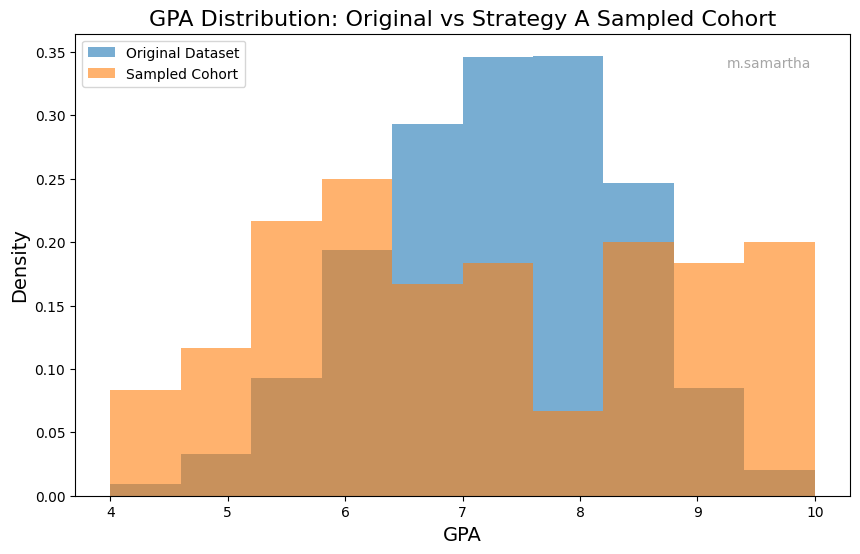

Repeat = 2


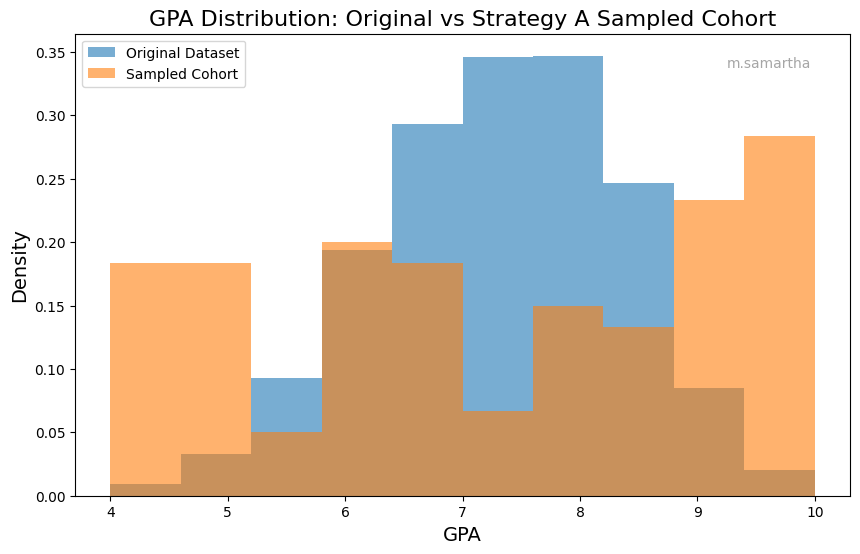

Repeat = 3


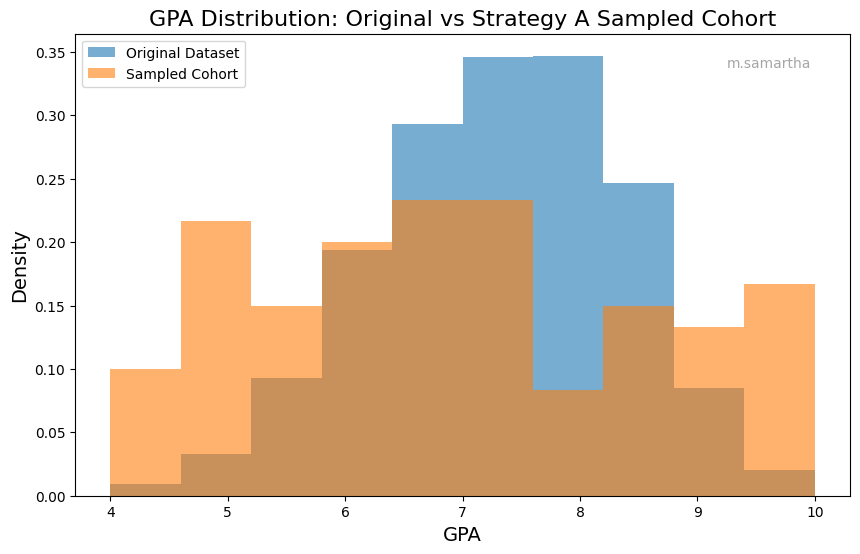

Repeat = 4


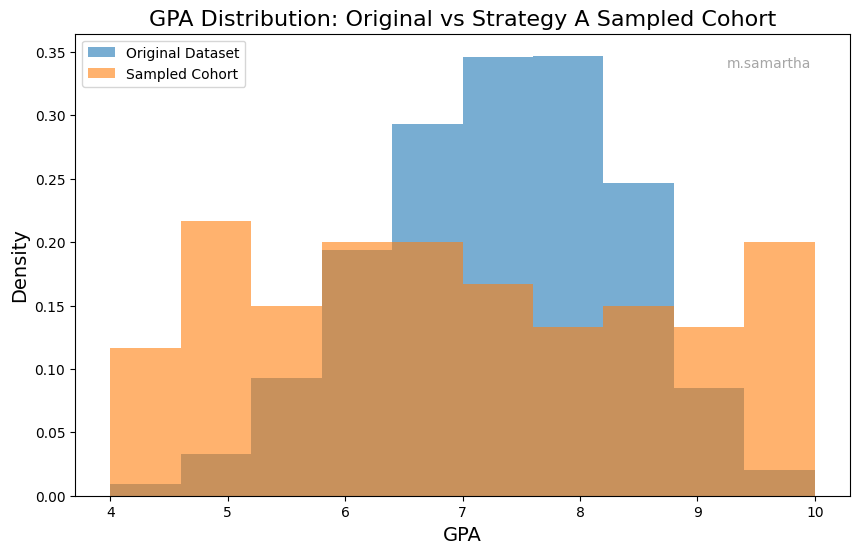

Repeat = 5


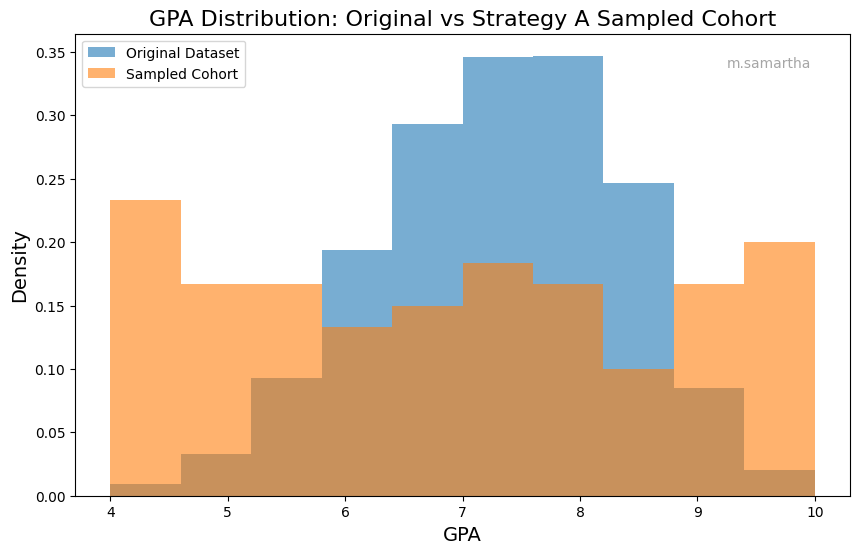

In [ ]:
class gpa_cohort:
    def __init__(self, df, seed: int = seed):
        self.data = df
        self.rng = np.random.default_rng(seed)

        # Pre-compute GPA bins
        self.data["GPA_bin"] = pd.cut(
            self.data["GPA"], bins=10, labels=False, include_lowest=True
        )

    def sample_gpa_uniform(self, n: int = 100, bins: int = 10) -> pd.DataFrame:
        """Select n students using Sampling Strategy A"""
        sampled = []
        gpa_bins = list(range(bins))

        while len(sampled) < n:
            # Pick a bin uniformly
            chosen_bin = self.rng.choice(gpa_bins)

            group = self.data[self.data["GPA_bin"] == chosen_bin]
            if len(group) == 0:
                continue  # skip if no student in that bin

            student = group.sample(
                n=1,
                replace=False,  # dont allow resampling
                random_state=self.rng.integers(1e6)
            )
            sampled.append(student)

        sampled_df = pd.concat(sampled).drop(columns=["GPA_bin"])
        return sampled_df.reset_index(drop=True)

    def plot_gpa_histogram_comparison(self, sampled_df: pd.DataFrame, bins: int = 10) -> None:
        """Plot GPA histogram for original vs sampled dataset"""
        plt.figure(figsize=(10, 6))

        # Original dataset histogram
        plt.hist(self.data["GPA"], bins=bins, alpha=0.6, label="Original Dataset", density=True)

        # Sampled dataset histogram
        plt.hist(sampled_df["GPA"], bins=bins, alpha=0.6, label="Sampled Cohort", density=True)

        plt.title("GPA Distribution: Original vs Strategy A Sampled Cohort", fontsize=16)
        plt.xlabel("GPA", fontsize=14)
        plt.ylabel("Density", fontsize=14)
        plt.legend()
        plt.text(
            0.95, 0.95, "m.samartha",
            ha='right', va='top',
            transform=plt.gca().transAxes,
            fontsize=10, color='grey', alpha=0.7
        )
        plt.show()

# Test
gpa = gpa_cohort(dataset.get_full_dataframe())
for i in range(5):
    sampled_gpa = gpa.sample_gpa_uniform(n=100)
    print(f"Repeat = {i + 1}")
    gpa.plot_gpa_histogram_comparison(sampled_gpa)


#### Observation
I sampled without replacing because, since we are choosing approximately 10 students from each bin, and each bin has significantly more students than 10, the impact of sampling without replacement is minimal.

## Q1.5 Program-Major Balanced Cohort


--- Sample 1 ---
Counts per (program, major):
Major    B.Tech  MS  PhD
Program                 
CSE           4   3    7
ECE           7   4    6
CHD           3   1    5
CND           9   5    6


/tmp/ipykernel_60578/2125572031.py:40: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  counts = sampled_df.pivot_table(index="Program", columns="Major", values="Gender",


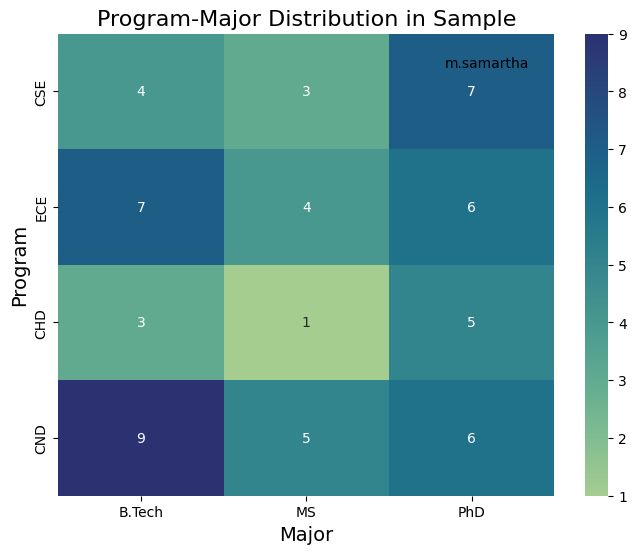


--- Sample 2 ---
Counts per (program, major):
Major    B.Tech  MS  PhD
Program                 
CSE           5   7    3
ECE           3   8    4
CHD           5   5    4
CND           5   7    4


/tmp/ipykernel_60578/2125572031.py:40: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  counts = sampled_df.pivot_table(index="Program", columns="Major", values="Gender",


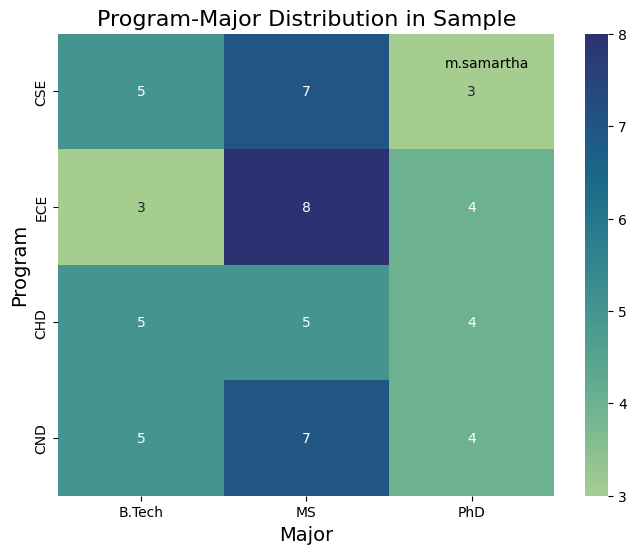


--- Sample 3 ---
Counts per (program, major):
Major    B.Tech  MS  PhD
Program                 
CSE           2   3    6
ECE           5   5   11
CHD           4   4    5
CND           4   4    7


/tmp/ipykernel_60578/2125572031.py:40: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  counts = sampled_df.pivot_table(index="Program", columns="Major", values="Gender",


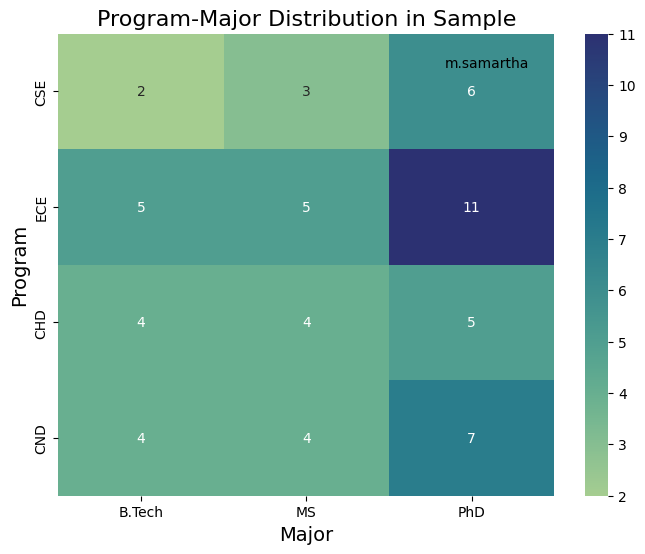


--- Sample 4 ---
Counts per (program, major):
Major    B.Tech  MS  PhD
Program                 
CSE           3   4    3
ECE           5   5    7
CHD           4   7    6
CND           5   7    4


/tmp/ipykernel_60578/2125572031.py:40: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  counts = sampled_df.pivot_table(index="Program", columns="Major", values="Gender",


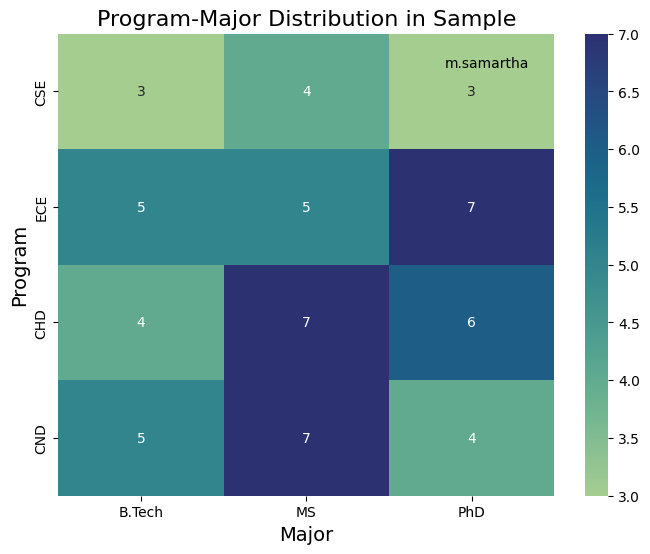


--- Sample 5 ---
Counts per (program, major):
Major    B.Tech  MS  PhD
Program                 
CSE           9   1    3
ECE           5   5    3
CHD           3   4    6
CND           6   5   10


/tmp/ipykernel_60578/2125572031.py:40: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  counts = sampled_df.pivot_table(index="Program", columns="Major", values="Gender",


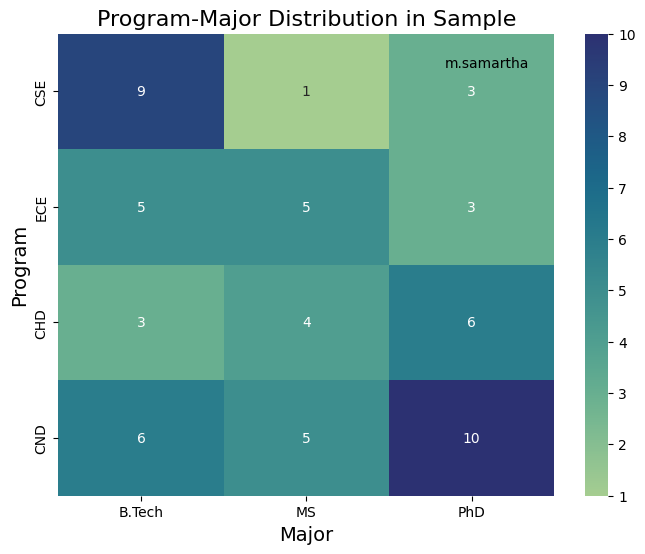

In [ ]:
class ProgramMajorSampler:
    def __init__(self, df: pd.DataFrame, seed: int = seed):
        self.data = df
        self.rng = np.random.default_rng(seed)

    def sample_program_major_strategyA(self, n: int = 60) -> pd.DataFrame:
        """Sampling using strategy-A"""
        # List of all categories
        categories = list(self.data.groupby(["Program", "Major"]).groups.keys())

        sampled_rows = []
        for _ in range(n):
            # Randomly and uniformly pick a category
            chosen_cat = self.rng.choice(categories)

            # Pick a student from this category
            group = self.data[(self.data["Program"] == chosen_cat[0]) &
                              (self.data["Major"] == chosen_cat[1])]

            chosen_student = group.sample(
                n=1,
                replace=False,  
                random_state=self.rng.integers(1e6)
            )
            sampled_rows.append(chosen_student)

        # Combine all sampled rows
        sampled_df = pd.concat(sampled_rows).reset_index(drop=True)
        return sampled_df

    def repeat_sampling(self, repeats: int = 5, n: int = 60) -> list[pd.DataFrame]:
        """Repeat Strategy A multiple times"""
        return [self.sample_program_major_strategyA(n) for _ in range(repeats)]

    def show_program_major_counts_and_heatmap(self, sampled_df: pd.DataFrame) -> None:
        """Show counts and heatmap of program-major distribution"""
        sampled_df["Program"] = pd.Categorical(sampled_df["Program"], 
                                             categories=["CSE", "ECE", "CHD", "CND"],
                                             ordered=True)
        counts = sampled_df.pivot_table(index="Program", columns="Major", values="Gender",
                                aggfunc="size", fill_value=0)
        
        print("Counts per (program, major):")
        print(counts)

        plt.figure(figsize=(8, 6))
        sns.heatmap(counts, annot=True, fmt="d", cmap="crest")
        plt.title("Program-Major Distribution in Sample", fontsize = 16)
        plt.xlabel("Major", fontsize = 14)
        plt.ylabel("Program", fontsize = 14)
        plt.text(
            0.95, 0.95, "m.samartha",
            ha='right', va='top',
            transform=plt.gca().transAxes,
            fontsize=10, color='black', alpha=1.0
        )
        plt.show()

# Test
program_major_sampler = ProgramMajorSampler(dataset.get_full_dataframe())
repeated_samples = program_major_sampler.repeat_sampling(repeats=5, n=60)

# For each repetition, show counts/heatmap
for i, sampled_df in enumerate(repeated_samples, start=1):
    print(f"\n--- Sample {i} ---")
    program_major_sampler.show_program_major_counts_and_heatmap(sampled_df)


#### Observations
In the data, no groups were small. While sampling, since we are using the Strategy-A, every group is more or less equally represented (around 5 samples). If any group were to be small, we could potentially oversample from that group to ensure it is adequately represented in the final sample.